In [1]:
# importing essential packages
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import colors
%matplotlib inline
from IPython.display import HTML

# Ski Resorts
The ski resorts listed below are major ski areas in the tri-state area that can be easily accessed by car from New York City. To improve the precision, we collect data using mountain summit coordinates.

In [2]:
d = np.array([['Hunter', 42.204320, -74.211142, 'NY'], 
              ["Jack Frost", 41.107435, -75.653369, 'PA'], 
              ["Big Boulder", 41.049714, -75.601159, 'PA'], 
              ['Windham',42.293579, -74.256700,'NY'], 
              ['Mountain Creek',41.190654, -74.505480, 'NJ'],
              ['Roundtop',40.109088, -76.927872, 'PA'],
              ['Mt Snow',42.960033, -72.920917, 'VT'],
              ['Mohawk', 41.838108, -73.315123,'CT'],
              ['Killington',43.626042, -72.796885, 'VT'],
              ['Stowe',44.531812, -72.781076, 'VT'],
              ['Stratton',43.113116, -72.907889,'VT'],
              ['Sugarbush', 44.135530, -72.893661,'VT'],
              ['Okemo', 43.401605, -72.717839,'VT']])
df = pd.DataFrame(data = d, columns = ['name', 'lat', 'lon','state'])
df = df.set_index(['name'])
df

,lat,lon,state
name,,,
Hunter,42.20432,-74.211142,NY
Jack Frost,41.107435,-75.653369,PA
Big Boulder,41.049714,-75.601159,PA
Windham,42.293579,-74.2567,NY
Mountain Creek,41.190654,-74.50548,NJ
Roundtop,40.109088,-76.927872,PA
Mt Snow,42.960033,-72.920917,VT
Mohawk,41.838108,-73.315123,CT
Killington,43.626042,-72.796885,VT


# Define function to query data from API
## Create function to get data for one day

In [220]:
 def getweather(lat, lon, date):
    """
    This function provide the average temperature and wind speed of one location in a single date.
    """
    
    # convert time to unix time
    date = pd.to_datetime(date)
    start = date.timestamp()
    
    # Get API data
    url = "https://history.openweathermap.org/data/2.5/history/city?"

    parameters = {"lat": lat, "lon": lon, "start": start, "cnt" : 24, "appid": "API KEY HERE", "units": "imperial"}

    r = requests.get(url, parameters)
    
    data = json.loads(r.text)
    
    # get average temp and wind speed
    temp = []
    for i in range(24):
        temp.append(data['list'][i]['main']['temp'])
    temp = sum(temp)/len(temp)

    wind_speed = []
    for i in range(24):
        wind_speed.append(data['list'][i]['wind']['speed'])
    wind_speed = sum(wind_speed)/len(wind_speed)
    
    return temp, wind_speed, date

In [221]:
# example
getweather(df.loc['Hunter']['lat'],df.loc['Hunter']['lon'], "2021-12-19")

(32.68125, 6.515416666666667, Timestamp('2021-12-19 00:00:00'))

## Create a function to query data of all resorts for one day embeding the previous function.

In [202]:
def getweatherall(date):
    """
    This function provide the average temperature and wind speed for all resorts in a single date.
    """
    temp = []
    wind_speed = []
    for i in df.index.tolist():
        data = getweather(df.loc[i]['lat'],df.loc[i]['lon'], date)
        temp.append(data[0])
        wind_speed.append(data[1])
    output = pd.DataFrame({'name': df.index.tolist(), 'temp': temp, 'wind_speed': wind_speed, 'date':date})
    return output

Get a range of date to query data for all dates

In [223]:
# initialize df_all
df_all = getweatherall("2021-12-19")
df_all

,name,temp,wind_speed,date
0,Hunter,32.681250,6.515417,2021-12-19
1,Jack Frost,33.566250,11.320833,2021-12-19
2,Big Boulder,31.441667,4.212500,2021-12-19
3,Windham,32.240417,3.673750,2021-12-19
4,Mountain Creek,36.427500,3.367083,2021-12-19
5,Roundtop,39.973333,10.220833,2021-12-19
6,Mt Snow,24.448333,4.962500,2021-12-19
7,Mohawk,30.873333,3.010417,2021-12-19
8,Killington,26.377083,2.887500,2021-12-19
9,Stowe,23.507083,7.241250,2021-12-19


In [224]:
# define ski season range
time_range = pd.date_range("2021-12-20","2022-4-2")

In [225]:
# query all data from API
for d in time_range:
    df_all = pd.concat([df_all, getweatherall(d)])
df_all

,name,temp,wind_speed,date
0,Hunter,32.681250,6.515417,2021-12-19
1,Jack Frost,33.566250,11.320833,2021-12-19
2,Big Boulder,31.441667,4.212500,2021-12-19
3,Windham,32.240417,3.673750,2021-12-19
4,Mountain Creek,36.427500,3.367083,2021-12-19
...,...,...,...,...
8,Killington,36.501667,11.173750,2022-04-02 00:00:00
9,Stowe,33.349167,10.475417,2022-04-02 00:00:00
10,Stratton,32.573333,12.881250,2022-04-02 00:00:00
11,Sugarbush,34.252500,5.029583,2022-04-02 00:00:00


In [226]:
# save progress
df_all.to_csv("df_all.csv")

In [3]:
# load progress
df_all = pd.read_csv("df_all.csv").drop(columns = ['Unnamed: 0'])

In [4]:
# unify datetime format
df_all['date'] = pd.to_datetime(df_all['date'].astype(str), format='%Y/%m/%d')
df_all

,name,temp,wind_speed,date
0,Hunter,32.681250,6.515417,2021-12-19
1,Jack Frost,33.566250,11.320833,2021-12-19
2,Big Boulder,31.441667,4.212500,2021-12-19
3,Windham,32.240417,3.673750,2021-12-19
4,Mountain Creek,36.427500,3.367083,2021-12-19
...,...,...,...,...
1360,Killington,36.501667,11.173750,2022-04-02
1361,Stowe,33.349167,10.475417,2022-04-02
1362,Stratton,32.573333,12.881250,2022-04-02
1363,Sugarbush,34.252500,5.029583,2022-04-02


## Data Description
Due to the Openweather API restriction, we can only query history data for the past one year for education or research use. (I'm still trying to contact another weather API website). 

The formation of powder snow is conditioned on **temperature** and **wind speed**, so the data queried above is the temperature and wind speed data for all 13 ski resorts **from 2021-12-19 to 2022-04-02** (the snow season period).

# Visulizing temp and wind speed change over time

In [5]:
# data preperation
df_temp = df_all.drop(columns = ['wind_speed'])
df_temp = df_temp.pivot(index = 'date', columns = 'name', values = 'temp')
df_temp

name,Big Boulder,Hunter,Jack Frost,Killington,Mohawk,Mountain Creek,Mt Snow,Okemo,Roundtop,Stowe,Stratton,Sugarbush,Windham
date,,,,,,,,,,,,,
2021-12-19,31.441667,32.681250,33.566250,26.377083,30.873333,36.427500,24.448333,28.095417,39.973333,23.507083,24.448333,24.193333,32.240417
2021-12-20,22.460833,23.228750,24.831250,16.292500,22.942917,27.178333,15.040417,17.946250,28.961667,15.680000,15.040417,16.597917,23.266250
2021-12-21,26.550833,29.911250,29.061250,29.610417,28.493750,30.410417,24.951250,28.717500,30.011667,29.167917,24.951250,30.333750,31.056250
2021-12-22,30.599583,32.838333,32.543333,30.450833,32.662500,35.770833,26.809167,30.395833,34.715000,29.502500,26.809167,30.084167,33.897083
2021-12-23,25.087917,27.988333,27.411250,21.713333,26.284583,30.063750,19.040833,23.657500,29.494583,16.861250,19.040833,18.545417,27.571667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,21.522500,24.153333,24.066250,19.187917,22.001250,26.248333,15.646667,20.820417,29.212083,18.330833,15.646667,19.220417,24.292083
2022-03-30,26.807500,29.883333,29.296250,27.438750,29.130833,32.716667,25.450417,30.876250,34.423750,27.192083,25.450417,27.920417,30.823750
2022-03-31,43.863750,42.537917,47.754583,44.238333,42.522500,48.092917,41.205000,42.521667,53.878750,41.894167,41.205000,42.974167,44.532083


In [9]:
# bar chart race plot
bcr.bar_chart_race(df=df_temp, filename='temp bar chart race.mp4', title = 'Temperature (°F) change over the snow season',fixed_max=True,fixed_order=True)

In [7]:
# bar chart race video
HTML("""
    <video alt="test" controls>
        <source src="temp bar chart race.mp4" type="video/mp4">
    </video>
""")

In [9]:
# data preperation
df_ws = df_all.drop(columns = ['wind_speed'])
df_ws = df_ws.pivot(index = 'date', columns = 'name', values = 'temp')
# bar chart race plot
bcr.bar_chart_race(df=df_ws, filename='wind speed bar chart race.mp4', title = 'Wind speed (mph) change over the snow season',fixed_max=True,fixed_order=True)

In [8]:
# bar chart race video
HTML("""
    <video alt="test" controls>
        <source src="wind speed bar chart race.mp4" type="video/mp4">
    </video>
""")

From the bar chart iteration plot we can see that the temperature and wind speed are quite fluctuant over the snow season, and possibly subject to yearly temporary condition. Thus, the data of one year may not be precision enough to do a fine granularity powder snow prediction. But in the following chapter, we can still summrize which period and which resorts are ideal for catching powder snow by analyzing the occurence number.

# Define the weather condition for powder
Since major resorts all have snowmaking setups, the weather elements we need to consider are temperature and wind speed.
## Temp
Ideal temperatures for light and fluffy snow tend to fall between *0°F and 10°F* near or above the summit of the mountain.
## Wind
Along with cold temperatures, we are looking for winds slower than about 15 miles per hour near the summit of the mountain. Winds stronger than 15 miles per hour will tend to pick up the snow and pack it more closely together as it blows around during and after it falls.

Collentine. (2019, August). *Perfect powder - explained*. OpenSnow. Retrieved December 11, 2022, from https://opensnow.com/news/post/perfect-powder-explained

In [11]:
# initialize powder variable
df_all['powder'] = False
# assign value to powder according to temp and wind speed
df_all.loc[(df_all['temp'] >= 0)&(df_all['temp'] <= 10)&(df_all['wind_speed']<15),'powder'] = True
df_all

,name,temp,wind_speed,date,powder
0,Hunter,32.681250,6.515417,2021-12-19,False
1,Jack Frost,33.566250,11.320833,2021-12-19,False
2,Big Boulder,31.441667,4.212500,2021-12-19,False
3,Windham,32.240417,3.673750,2021-12-19,False
4,Mountain Creek,36.427500,3.367083,2021-12-19,False
...,...,...,...,...,...
1360,Killington,36.501667,11.173750,2022-04-02,False
1361,Stowe,33.349167,10.475417,2022-04-02,False
1362,Stratton,32.573333,12.881250,2022-04-02,False
1363,Sugarbush,34.252500,5.029583,2022-04-02,False


# Powder day list of the last season
## Full list with weather and location variables

In [12]:
# get the powder date and location list
powder_list = df_all.loc[df_all['powder'] == True,:].drop(columns = ['powder',])
powder_list = pd.merge(powder_list,df.reset_index(),on = 'name')

# change column order
powder_list = powder_list[['name', 'date','temp', 'wind_speed', 'state', 'lat', 'lon']]

pd.set_option("display.max_rows", None)
# Puts the scrollbar next to the DataFrame
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             powder_list.style.render() +
             "</div>"))

,name,date,temp,wind_speed,state,lat,lon
0,Stowe,2022-01-03 00:00:00,8.923750,8.199167,VT,44.531812,-72.781076
1,Stowe,2022-01-04 00:00:00,8.019583,1.482500,VT,44.531812,-72.781076
2,Stowe,2022-01-08 00:00:00,9.028333,5.316667,VT,44.531812,-72.781076
3,Stowe,2022-01-12 00:00:00,9.599583,5.193750,VT,44.531812,-72.781076
4,Stowe,2022-01-19 00:00:00,9.991667,4.771250,VT,44.531812,-72.781076
5,Stowe,2022-01-24 00:00:00,5.960833,3.497917,VT,44.531812,-72.781076
6,Stowe,2022-01-26 00:00:00,4.573750,9.830833,VT,44.531812,-72.781076
7,Stowe,2022-01-29 00:00:00,0.159167,7.192917,VT,44.531812,-72.781076
8,Stowe,2022-01-30 00:00:00,5.073333,7.095417,VT,44.531812,-72.781076
9,Stowe,2022-01-31 00:00:00,9.011250,1.121667,VT,44.531812,-72.781076


## Full powder day list clean

In [40]:
powder_list_clean = powder_list.drop(columns = ['lat','lon','state','temp',"wind_speed"]).set_index('name')
pd.set_option("display.max_rows", None)


# Puts the scrollbar next to the DataFrame
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             powder_list_clean.style.render() +
             "</div>"))

,date
name,
Stowe,2022-01-03 00:00:00
Stowe,2022-01-04 00:00:00
Stowe,2022-01-08 00:00:00
Stowe,2022-01-12 00:00:00
Stowe,2022-01-19 00:00:00
Stowe,2022-01-24 00:00:00
Stowe,2022-01-26 00:00:00
Stowe,2022-01-29 00:00:00
Stowe,2022-01-30 00:00:00


# Visualization 

In [54]:
image = np.zeros(nrows*ncols)
image

array([0., 0., 0., ..., 0., 0., 0.])

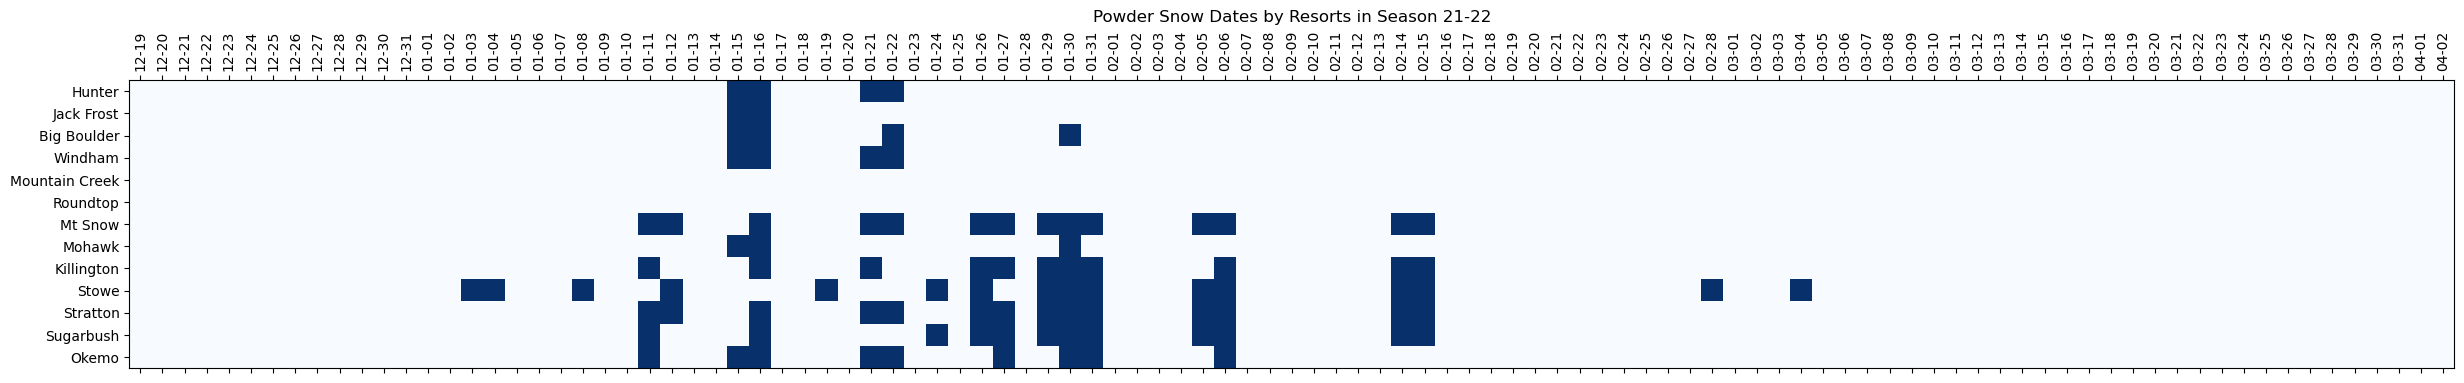

In [34]:
# Make a grid...
nrows, ncols = df.shape[0] , len(df_all['date'].unique())
image = np.zeros(nrows*ncols)

# Get a matrix of Powder data
image = df_all['powder'].array

# Reshape matrix
image = image.reshape((ncols,nrows))

# Plotting
row_labels = df.index
col_labels = pd.date_range("2021-12-19","2022-4-2").strftime('%m-%d')
matfig = plt.figure(figsize=(30,5))
plt.matshow(image.T, cmap='Blues',fignum=matfig.number)
#plt.matshow(image.T, cmap='Blues')
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.xticks(rotation=90)
plt.title('Powder Snow Dates by Resorts in Season 21-22')
plt.savefig('Powder Snow Dates by Resorts in Season 21-22.png')
plt.show()

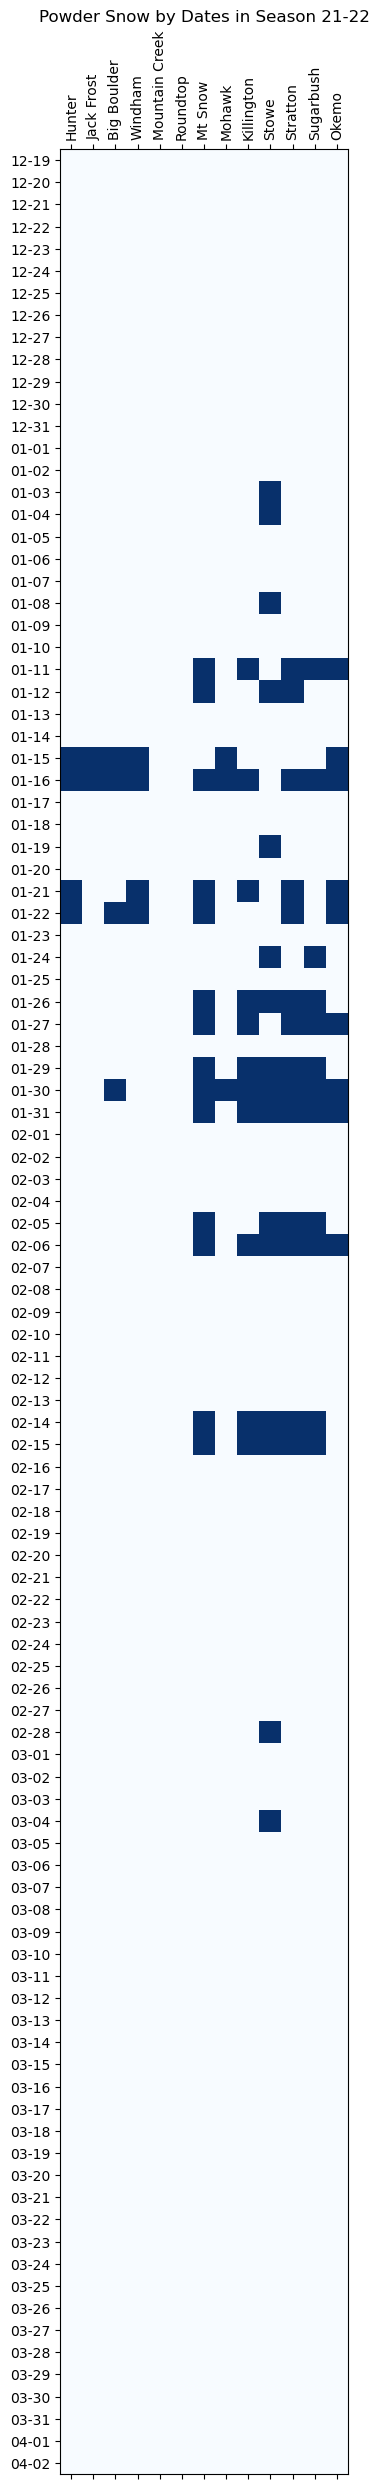

In [35]:
# Make a grid...
nrows, ncols = len(df_all['date'].unique()),df.shape[0]
image = np.zeros(nrows*ncols)

# Get a matrix of Powder data
image = df_all['powder'].array

# Reshape matrix
image = image.reshape((nrows,ncols))

# Plotting
row_labels = pd.date_range("2021-12-19","2022-4-2").strftime('%m-%d')
col_labels = df.index
matfig = plt.figure(figsize=(5,30))
plt.matshow(image, cmap='Blues',fignum=matfig.number)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.xticks(rotation=90)
plt.title('Powder Snow by Dates in Season 21-22')
plt.savefig('Powder Snow by Dates in Season 21-22.png')
plt.show()

# The resorts that observed most powder days over the last snow season

In [15]:
resorts_count = df_all.groupby('name').sum().drop(columns = ['temp', 'wind_speed'])
resorts_count = resorts_count.sort_values('powder',ascending=False)
resorts_count = pd.merge(resorts_count,df.reset_index(),on = 'name').drop(columns = ['lat', 'lon'])
resorts_count

,name,powder,state
0,Stowe,16,VT
1,Mt Snow,14,VT
2,Stratton,14,VT
3,Sugarbush,12,VT
4,Killington,11,VT
5,Okemo,9,VT
6,Big Boulder,4,PA
7,Hunter,4,NY
8,Windham,4,NY
9,Mohawk,3,CT


## visualization for best resorts

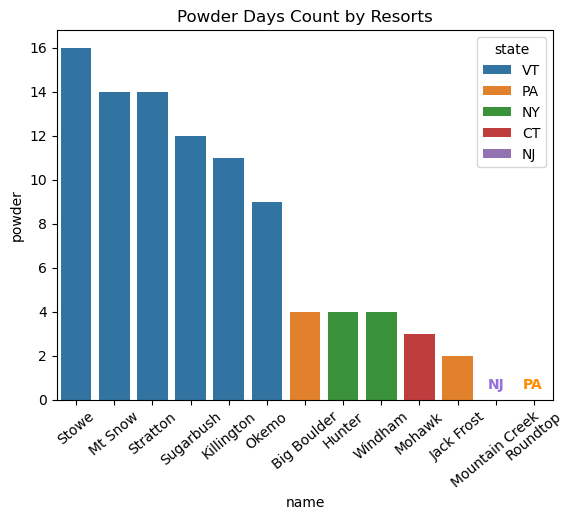

In [17]:
ax = sns.barplot(x='name', y='powder', data=resorts_count, hue='state',dodge=False)
plt.xticks(rotation=40)
plt.title("Powder Days Count by Resorts")
plt.text(10.8, 0.5, "NJ", horizontalalignment='left', size='medium', color='mediumpurple', weight ='bold')
plt.text(11.7, 0.5, "PA", horizontalalignment='left', size='medium', color='darkorange', weight ='bold')
plt.savefig('Powder Days Count by Resorts.png')

## Summary
From this plot, we can see that the resorts located in Vermont are our go-to place for powder snow since they take over the top of our list over the last snow season. And the occurrence of powder days calculated by our data in VT resorts are significantly higher than in other states. 

Among the resorts in Vermont, **Stowe, Mt Snow, and Stratton** are the **best places** for a powder snow trip.

# The better time for catching powder snow

Powder occurrence number by date

In [18]:
day_list = powder_list['date'].value_counts()
day_list

2022-01-16    10
2022-01-30     8
2022-02-06     6
2022-01-22     6
2022-01-21     6
2022-01-31     6
2022-01-15     6
2022-01-29     5
2022-01-26     5
2022-02-14     5
2022-02-15     5
2022-01-11     5
2022-01-27     5
2022-02-05     4
2022-01-12     3
2022-01-24     2
2022-01-04     1
2022-02-28     1
2022-03-04     1
2022-01-19     1
2022-01-08     1
2022-01-03     1
Name: date, dtype: int64

January is the best month to catch powder snow according to the history data. 
## Visualization for best days

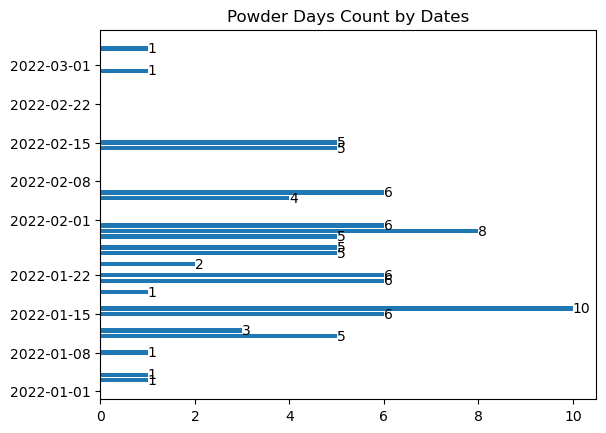

In [19]:
fig, ax = plt.subplots(1, 1)

p1 = ax.barh(day_list.index, day_list, align="center")
ax.set_title("Powder Days Count by Dates")
ax.bar_label(p1)
#plt.xticks(rotation=30)
plt.savefig('Powder Days Count by Dates.png')

## Summary
According to the plot, from mid-January to the early February is a ideal period for ski trip if you want cursh some powder. 
